In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
!pip install imutils
from imutils import paths

!pip install tensorflow
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
dataset=r'C:\Users\PRAJWALR\Music\models\data'
imagePaths=list(paths.list_images(dataset))

In [3]:
imagePaths

['C:\\Users\\PRAJWALR\\Music\\models\\data\\without_mask\\without_mask_1.jpg',
 'C:\\Users\\PRAJWALR\\Music\\models\\data\\without_mask\\without_mask_10.jpg',
 'C:\\Users\\PRAJWALR\\Music\\models\\data\\without_mask\\without_mask_100.jpg',
 'C:\\Users\\PRAJWALR\\Music\\models\\data\\without_mask\\without_mask_1000.jpg',
 'C:\\Users\\PRAJWALR\\Music\\models\\data\\without_mask\\without_mask_1001.jpg',
 'C:\\Users\\PRAJWALR\\Music\\models\\data\\without_mask\\without_mask_1002.jpg',
 'C:\\Users\\PRAJWALR\\Music\\models\\data\\without_mask\\without_mask_1003.jpg',
 'C:\\Users\\PRAJWALR\\Music\\models\\data\\without_mask\\without_mask_1004.jpg',
 'C:\\Users\\PRAJWALR\\Music\\models\\data\\without_mask\\without_mask_1005.jpg',
 'C:\\Users\\PRAJWALR\\Music\\models\\data\\without_mask\\without_mask_1006.jpg',
 'C:\\Users\\PRAJWALR\\Music\\models\\data\\without_mask\\without_mask_1007.jpg',
 'C:\\Users\\PRAJWALR\\Music\\models\\data\\without_mask\\without_mask_1008.jpg',
 'C:\\Users\\PRAJWALR\

In [4]:
data=[]
labels=[]

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)
   

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [6]:
data

[array([[[ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         ...,
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177]],
 
        [[ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         ...,
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177]],
 
        [[ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         ...,
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177]],
 
        ...,
 
        [[-0.7176471 , -0.7176471 

In [8]:
labels

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [9]:
data=np.array(data,dtype='float32')
labels=np.array(labels)

In [10]:
data.shape

(7553, 224, 224, 3)

In [11]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [12]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)

In [13]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [14]:
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=10)

In [15]:
train_X.shape

(6042, 224, 224, 3)

In [16]:
train_Y.shape

(6042, 2)

In [17]:
test_X.shape

(1511, 224, 224, 3)

In [18]:
test_Y.shape

(1511, 2)

In [19]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

In [20]:
baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [21]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [22]:
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)

model=Model(inputs=baseModel.input,outputs=headModel)

In [23]:
for layer in baseModel.layers:
    layer.trainable=False

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [25]:
learning_rate=0.001
Epochs=20
BS=12

opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

H=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)


model.save(r'C:\Users\PRAJWALR\Music\models\Mask-Detection-and-Recognition-using-Deep-Learning-Keras-master\i am\mobilenet_v2.models')

C:\Users\PRAJWALR\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
503/503 [==============================] - 710s 1s/step - loss: 0.1754 - accuracy: 0.9381 - val_loss: 0.0655 - val_accuracy: 0.9755
Epoch 2/20
503/503 [==============================] - 337s 669ms/step - loss: 0.1055 - accuracy: 0.9609
Epoch 3/20
503/503 [==============================] - 306s 609ms/step - loss: 0.0862 - accuracy: 0.9688
Epoch 4/20
503/503 [==============================] - 380s 755ms/step - loss: 0.0867 - accuracy: 0.9673
Epoch 5/20
503/503 [==============================] - 328s 652ms/step - loss: 0.0834 - accuracy: 0.9688
Epoch 6/20
503/503 [==============================] - 328s 652ms/step - loss: 0.0700 - accuracy: 0.9733
Epoch 7/20
503/503 [==============================] - 316s 628ms/step - loss: 0.0680 - accuracy: 0.9761
Epoch 8/20
503/503 [==============================] - 275s 547ms/step - loss: 0.0612 - accuracy: 0.9758
Epoch 9/20
503/503 [==============================] - 274s 545ms/step - loss: 0.0625 - accuracy: 0.9776
Epoch 10/20
503/503 [====

INFO:tensorflow:Assets written to: C:\Users\PRAJWALR\Music\models\Mask-Detection-and-Recognition-using-Deep-Learning-Keras-master\i am\mobilenet_v2.models\assets


INFO:tensorflow:Assets written to: C:\Users\PRAJWALR\Music\models\Mask-Detection-and-Recognition-using-Deep-Learning-Keras-master\i am\mobilenet_v2.models\assets


In [26]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

126/126 [==============================] - 140s 890ms/step
              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       745
without_mask       0.99      0.99      0.99       766

    accuracy                           0.99      1511
   macro avg       0.99      0.99      0.99      1511
weighted avg       0.99      0.99      0.99      1511



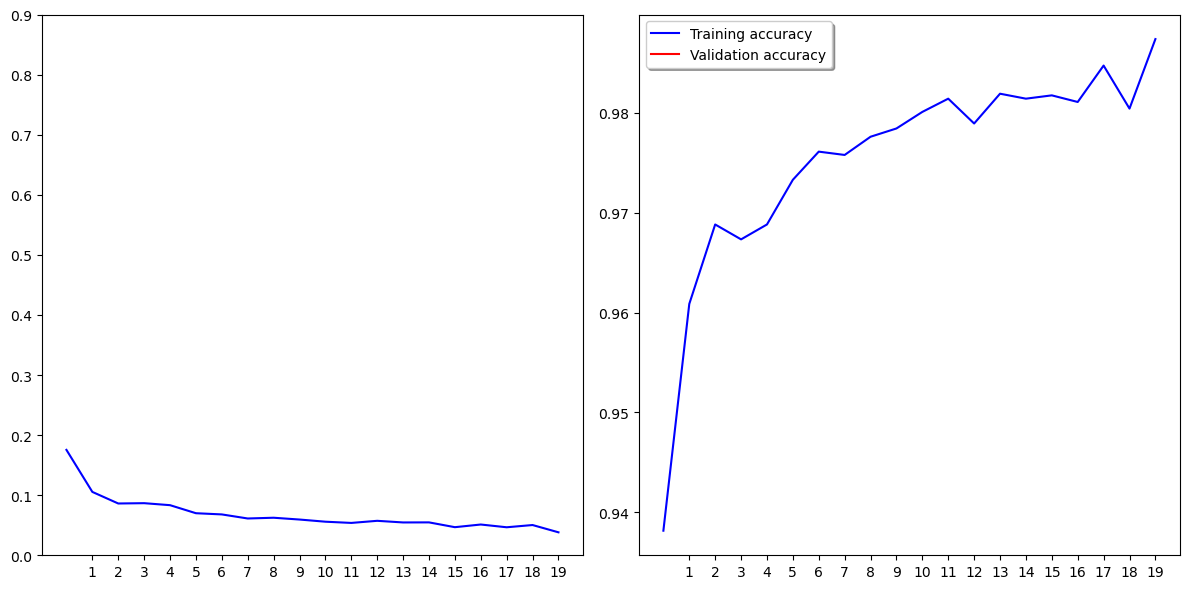

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(H.history['loss'], color='b', label="Training loss")
ax1.plot(H.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, Epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax2.plot(H.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(H.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, Epochs, 1))
legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

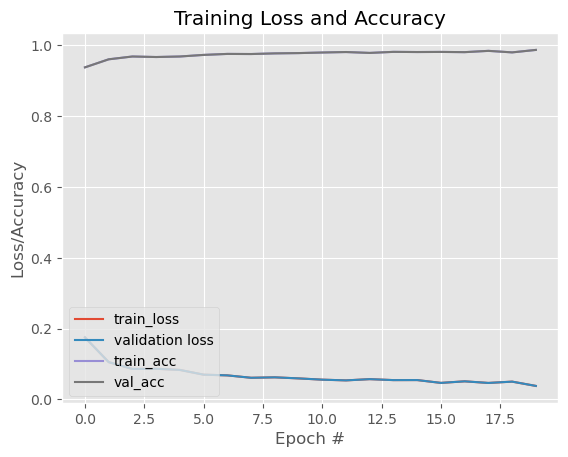

In [28]:
# plot the training loss and accuracy
import matplotlib.pyplot as plt
import seaborn as sns
N=Epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["loss"], label="validation loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

